In [10]:
#Base
import sys
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import datetime as dt
from datetime import datetime
from datetime import date
import json
import requests
import emoji
import re
import string
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

In [11]:
df = pd.read_csv('../datasets/muntot_final.csv', converters = {'tokens': eval, 'sentiment_dict':eval})

In [12]:
df.head()

username                                               text  \
0         ManUtd  under way at old trafford — come on united! 🔴⚪...   
1   NelsonNelli2  ready for battle.\n\n#mufc #muntot https://t.c...   
2        Dcfox82                       cmon #mufc 3pts today please   
3     lynger2000           come united!!!!!!!!!!!! 🔴🔴 #muntot #mufc   
4  URMySolskjaer  telles and cavani now done,  #mufc will have o...   

        tweetcreatedts            hashtags  retweetcount  likecount  \
0  2020-10-04 15:30:16  ['MUFC', 'MUNTOT']           262       1917   
1  2020-10-04 15:30:16  ['MUFC', 'MUNTOT']           757          0   
2  2020-10-04 15:30:16            ['mufc']             0          0   
3  2020-10-04 15:30:16  ['MUNTOT', 'MUFC']             0          0   
4  2020-10-04 15:30:16            ['MUFC']           432          0   

                                            acctdesc                location  \
0  Official #MUFC account. @ManUtd_ES 🇪🇸 | @ManUt...     Manchester, England   
1                     I'm jovial and  fun to be with  Port Harcourt, Nigeria   
2  work for nhs, Husband, dad of 3, student of li...           Derby,England   
3  A Scottish lass who will always and forever be...          Leeds, England   
4                                                NaN                     NaN   

   followers  totaltweets        usercreatedts             datetime      time  \
0   23298880        61791  2012-04-20 15:17:43  2020-10-04 15:30:00  15:30:00   
1          1           45  2020-09-25 07:43:39  2020-10-04 15:30:00  15:30:00   
2        595         4873  2010-10-18 16:11:48  2020-10-04 15:30:00  15:30:00   
3       3337        44646  2012-11-14 20:15:43  2020-10-04 15:30:00  15:30:00   
4         43         2738  2015-11-22 17:14:36  2020-10-04 15:30:00  15:30:00   

  mentions                                          cleantext  \
0      NaN  under way at old trafford  come on united mufc...   
1      NaN                      ready for battle mufc muntot    
2      NaN                            cmon mufc  today please   
3      NaN                            come united muntot mufc   
4      NaN  telles and cavani now done mufc will have one ...   

                                              tokens  \
0                         [way, old, trafford, come]   
1                                    [ready, battle]   
2                              [cmon, today, please]   
3                                             [come]   
4  [telles, cavani, one, final, push, see, finall...   

                                      sentiment_dict  sentiment_score  \
0  {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...           0.4215   
1  {'neg': 0.321, 'neu': 0.37, 'pos': 0.309, 'com...          -0.0258   
2  {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...           0.3182   
3  {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...           0.4215   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...           0.0000   

  sentiment_rating dominanttopic  
0              pos       topic_5  
1              neu       topic_2  
2              pos       topic_6  
3              pos       topic_5  
4              neu       topic_6

In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
matchmask = (df['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (df['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S'))
    

# Setting labels

In [6]:
# Annotate each of the goals on the xticks
match_x_labels =[]

In [7]:
# The laughs mask is missing 2 values, so the lables are adjusted accordingly
matchlol_x_labels =[]

# Tweets per minute

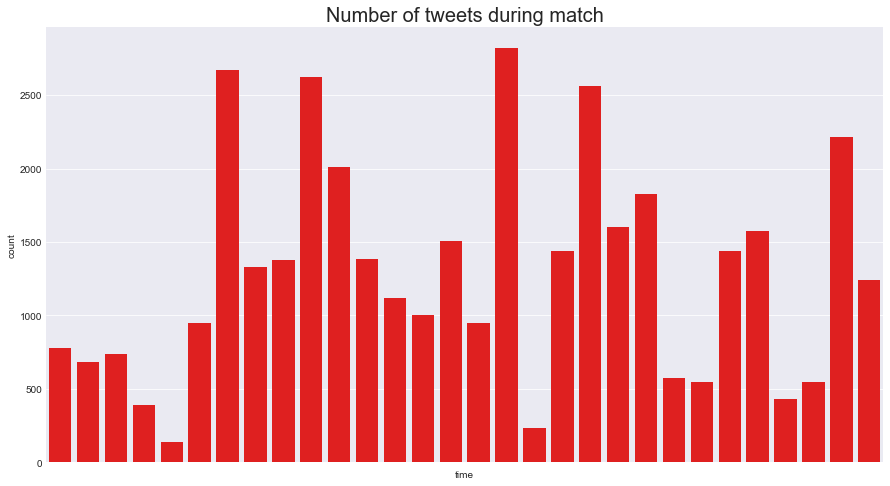

In [8]:
plt.figure(figsize=(15,8))
plt.title('Number of tweets during match',loc='center', fontsize=20)
ax = sns.countplot(x=df[matchmask]['time'], color='red')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right',fontsize=11)
plt.show()

# Social media term processing

In [9]:
terms = pd.read_csv('../datasets/muntot_terms.csv')

In [10]:
terms.head()

datetime      time    tokens
0  2020-10-04 15:30:00  15:30:00       way
0  2020-10-04 15:30:00  15:30:00       old
0  2020-10-04 15:30:00  15:30:00  trafford
0  2020-10-04 15:30:00  15:30:00      come
1  2020-10-04 15:30:00  15:30:00     ready

In [11]:
terms['datetime']=pd.to_datetime(terms['datetime'])

In [12]:
def find_lol(text):
    try:
        text = re.findall(r'\b(o?l+o+l+[ol]*)\b', text)
        if not text:
            text = np.NaN
    except:
        pass
    return text

In [13]:
lols = terms['tokens'].apply(find_lol)

In [14]:
lols.explode().value_counts()

lol             147
loool             8
lool              7
looool            6
loooool           4
lollll            4
looooool          3
loooolll          2
looooooooool      2
Name: tokens, dtype: int64

In [15]:
def find_swears(text):
    try:
        text = re.findall(r'\b(f+u+c+k+)\b', text)
        if not text:
            text = np.NaN
    except:
        pass
    return text

In [16]:
swears = terms['tokens'].apply(find_swears)

In [17]:
swears.explode().value_counts()

fuck               641
fuckkkkk             4
fuuuuuck             2
fuckkkkkkkkkkkk      2
fuckkkkkk            2
fuckk                2
Name: tokens, dtype: int64

In [18]:
def laughter(text):
    try:
        text= re.sub(r'\b(a*ha+h[ha]*)\b', 'haha', text)
        text= re.sub(r'\b(o?l+o+l+[ol]*)\b', 'lol', text)
        text= re.sub(r'\b(l+m+a+o+)\b', 'fuck', text)
    except:
        pass
    return text                 

In [19]:
def swearing(text):
    try:
        text= re.sub(r'\b(f+u+c+k+)\b', 'fuck', text)
        text= re.sub(r'\b(w+t+f+)\b', 'wtf', text)
    except:
        pass
    return text         

In [20]:
terms['tokens'] = terms['tokens'].apply(laughter).apply(swearing)

# There was laughter

In [21]:
lolmask = (df['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (df['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S')) & (terms['tokens'] == 'lol')

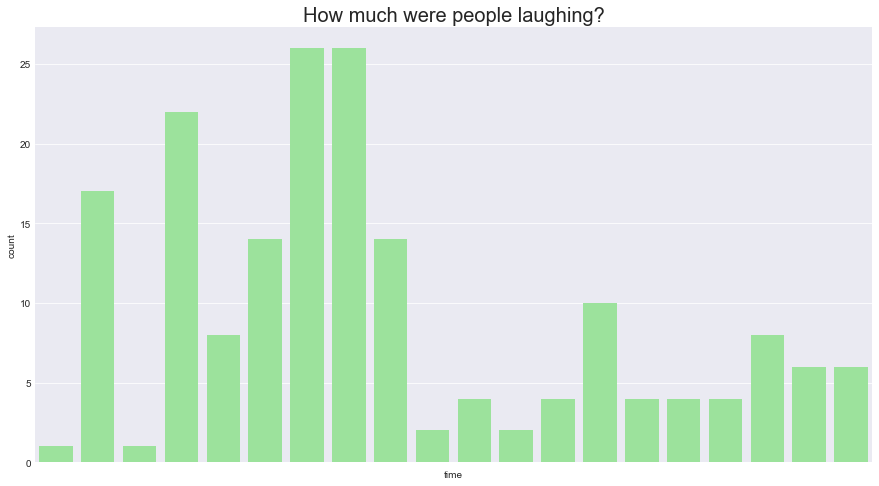

In [22]:
plt.figure(figsize=(15,8))
plt.title('How much were people laughing?',loc='center', fontsize=20)
ax = sns.countplot(x=terms[lolmask]['time'], color='lightgreen')
ax.set_xticklabels(matchlol_x_labels, rotation = 45, ha='right',fontsize=11)
plt.show()

# And there was anger

In [23]:
swearmask = (terms['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S')) & ((terms['tokens'] == 'wtf') | (terms['tokens'] == 'fuck'))
swearmaskw = (terms['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S')) & ((terms['tokens'] == 'wtf'))
swearmaskf = (terms['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S')) & ( (terms['tokens'] == 'fuck'))

In [24]:
terms[swearmask]

datetime      time tokens
167   2020-10-04 15:30:00  15:30:00   fuck
607   2020-10-04 15:29:00  15:29:00   fuck
2216  2020-10-04 15:31:00  15:31:00   fuck
2233  2020-10-04 15:31:00  15:31:00   fuck
2265  2020-10-04 15:31:00  15:31:00    wtf
...                   ...       ...    ...
37799 2020-10-04 17:22:00  17:22:00   fuck
37805 2020-10-04 17:22:00  17:22:00    wtf
38039 2020-10-04 17:22:00  17:22:00   fuck
38179 2020-10-04 17:21:00  17:21:00   fuck
38238 2020-10-04 17:21:00  17:21:00   fuck

[1005 rows x 3 columns]

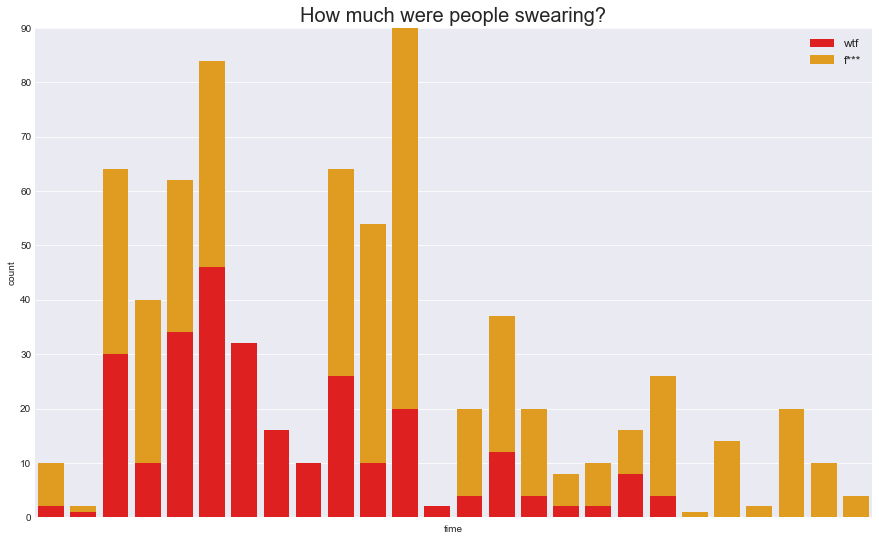

In [25]:
plt.figure(figsize=(15,9))
plt.title('How much were people swearing?',loc='center', fontsize=20)
order = terms[swearmaskw]['time'].append(terms[swearmaskf]['time']).unique()
ax = sns.countplot(x=terms[swearmaskw]['time'], order= order, zorder=2, color='red', label='wtf')
sns.countplot(x=terms[swearmaskf]['time'], color='orange', order=order, label='f***')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right')
ax.set_ylim(0,90)
ax.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes, prop={'size':12})
plt.show()

# Number of mentions

In [26]:
def add_mentions(text):
    mentionlist = re.findall(r'\B@\w+', text)
    if not mentionlist:
        mentionlist = np.NaN
    return mentionlist
df['mentions'] = df['text'].apply(add_mentions)

In [27]:
mentioncount = df['mentions'].explode('mentions').value_counts()[:20]

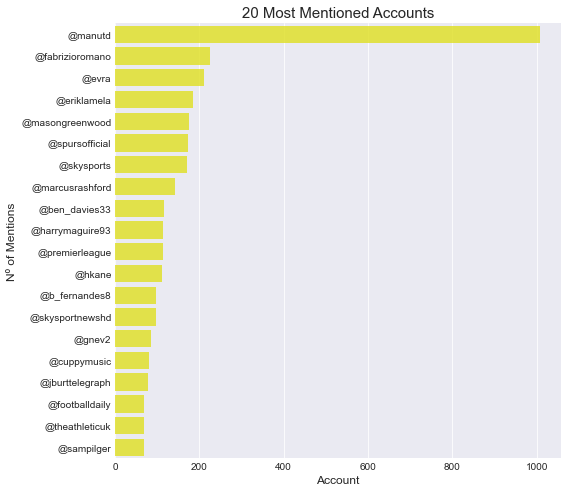

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(mentioncount.values, mentioncount.index, alpha=0.8,color='yellow')
plt.title('20 Most Mentioned Accounts', fontsize=15)
plt.ylabel('Nº of Mentions', fontsize=12)
plt.xlabel('Account', fontsize=12)
plt.show()

# Number of hashtags

In [29]:
def add_hashtags(text):
    hashtaglist = re.findall(r'\B(\#[a-zA-Z0-9]+\b)',text)
    if not hashtaglist:
        hashtaglist = np.NaN
    return hashtaglist
df['hashtags'] = df['text'].apply(add_hashtags)

In [30]:
df['hashtags'].explode('hashtags').value_counts().head(20)

#muntot              24733
#mufc                18641
#thfc                 2354
#transfers            1623
#mulive               1579
#coys                  525
#fpl                   499
#pl                    365
#mantot                311
#premierleague         309
#ggmu                  282
#manchesterunited      274
#manutd                263
#spurs                 243
#mun                   236
#cuppymufc             235
#muf                   226
#totmun                191
#glazersout            163
#oleout                154
Name: hashtags, dtype: int64

In [31]:
hashtagcount = df['hashtags'].explode('hashtags').value_counts()[:20]

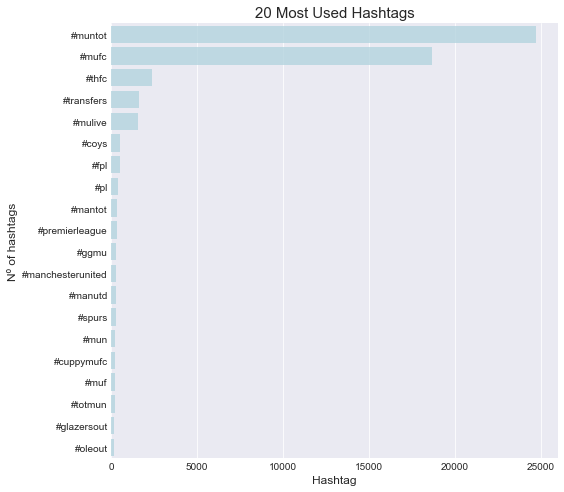

In [32]:
plt.figure(figsize=(8,8))
sns.barplot(hashtagcount.values, hashtagcount.index, alpha=0.8, color='lightblue')
plt.title('20 Most Used Hashtags', fontsize=15)
plt.ylabel('Nº of hashtags', fontsize=12)
plt.xlabel('Hashtag', fontsize=12)
plt.show()

# Average sentiment of tweets

In [33]:
df.groupby('time')['sentiment_score'].mean()

time
15:27:00    0.378587
15:28:00    0.363348
15:29:00    0.386428
15:30:00    0.370327
15:31:00    0.076214
15:32:00    0.062023
15:33:00    0.045258
15:34:00    0.019916
15:36:00    0.019051
15:37:00    0.030840
15:56:00    0.112263
15:57:00    0.097073
15:58:00    0.052243
15:59:00    0.050334
16:00:00    0.022501
16:05:00    0.039293
16:06:00   -0.005118
16:07:00   -0.015315
16:17:00    0.074095
16:18:00    0.053770
16:38:00   -0.034326
16:39:00   -0.061967
16:40:00   -0.000258
17:05:00    0.097234
17:06:00    0.053164
17:07:00    0.002160
17:08:00   -0.064613
17:21:00    0.064340
17:22:00    0.083257
17:23:00    0.115901
Name: sentiment_score, dtype: float64

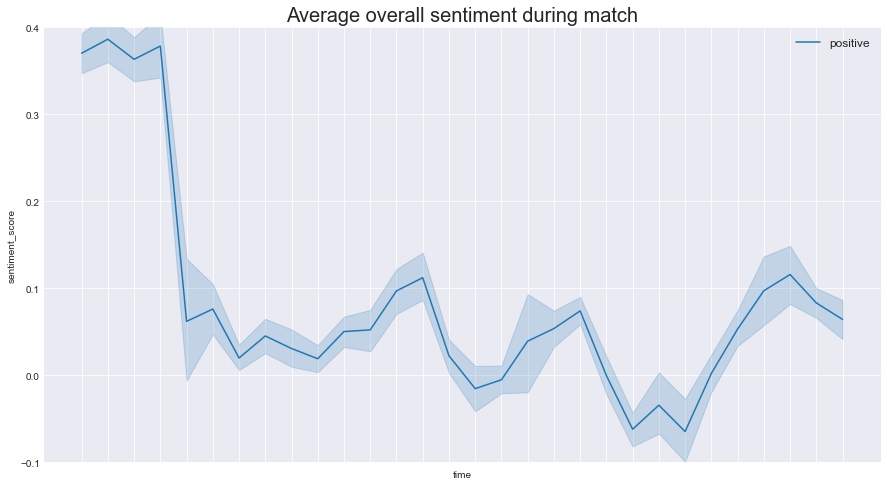

In [41]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df[matchmask], x='time', y='sentiment_score', ax=ax, label='positive')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right')
plt.title('Average overall sentiment during match',loc='center', fontsize=20)

ax.set_ylim(-0.1,0.4)
ax.get_legend().remove()
fig.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes,prop={'size':12})
plt.show()

# Sentiment polarity of tweets

In [35]:
possen1 = df[matchmask].loc[df['sentiment_rating']=='pos'].groupby('time')['sentiment_score'].mean()
possen = df[matchmask].loc[df['sentiment_rating']=='pos']

In [36]:
negsen1 = df[matchmask].loc[df['sentiment_rating']=='neg'].groupby('time')['sentiment_score'].mean()
negsen = df[matchmask].loc[df['sentiment_rating']=='neg']

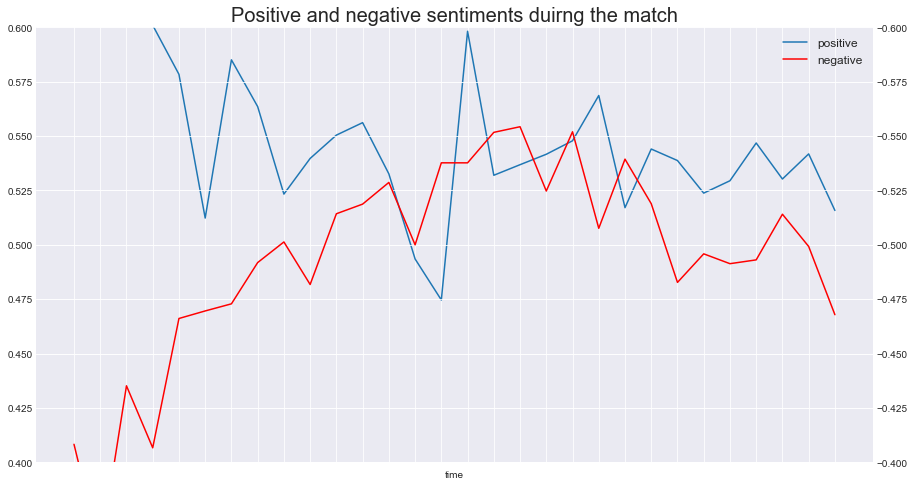

In [42]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=possen1, x=possen1.index, y=possen1.values, ax=ax, label='positive')
ax2 = ax.twinx()
sns.lineplot(data=negsen1, x=negsen1.index, y=negsen1.values, ax=ax2, color='r', label='negative')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right')
plt.title('Positive and negative sentiments duirng the match',loc='center', fontsize=20)
ax.set_ylim(0.4,0.6)
ax2.set_ylim(-0.4,-0.6)
ax.get_legend().remove()
ax2.get_legend().remove()
fig.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes,prop={'size':12})
plt.show()

# Sentiment polarity of tweets by dominant topic

In [38]:
facemask = (df['datetime'] >= datetime.strptime('2020-10-04 13:31:00','%Y-%m-%d %H:%M:%S')) & (df['datetime'] <= datetime.strptime('2020-10-04 17:24:00','%Y-%m-%d %H:%M:%S')) & (df['sentiment_rating'].isin(['pos','neg']))

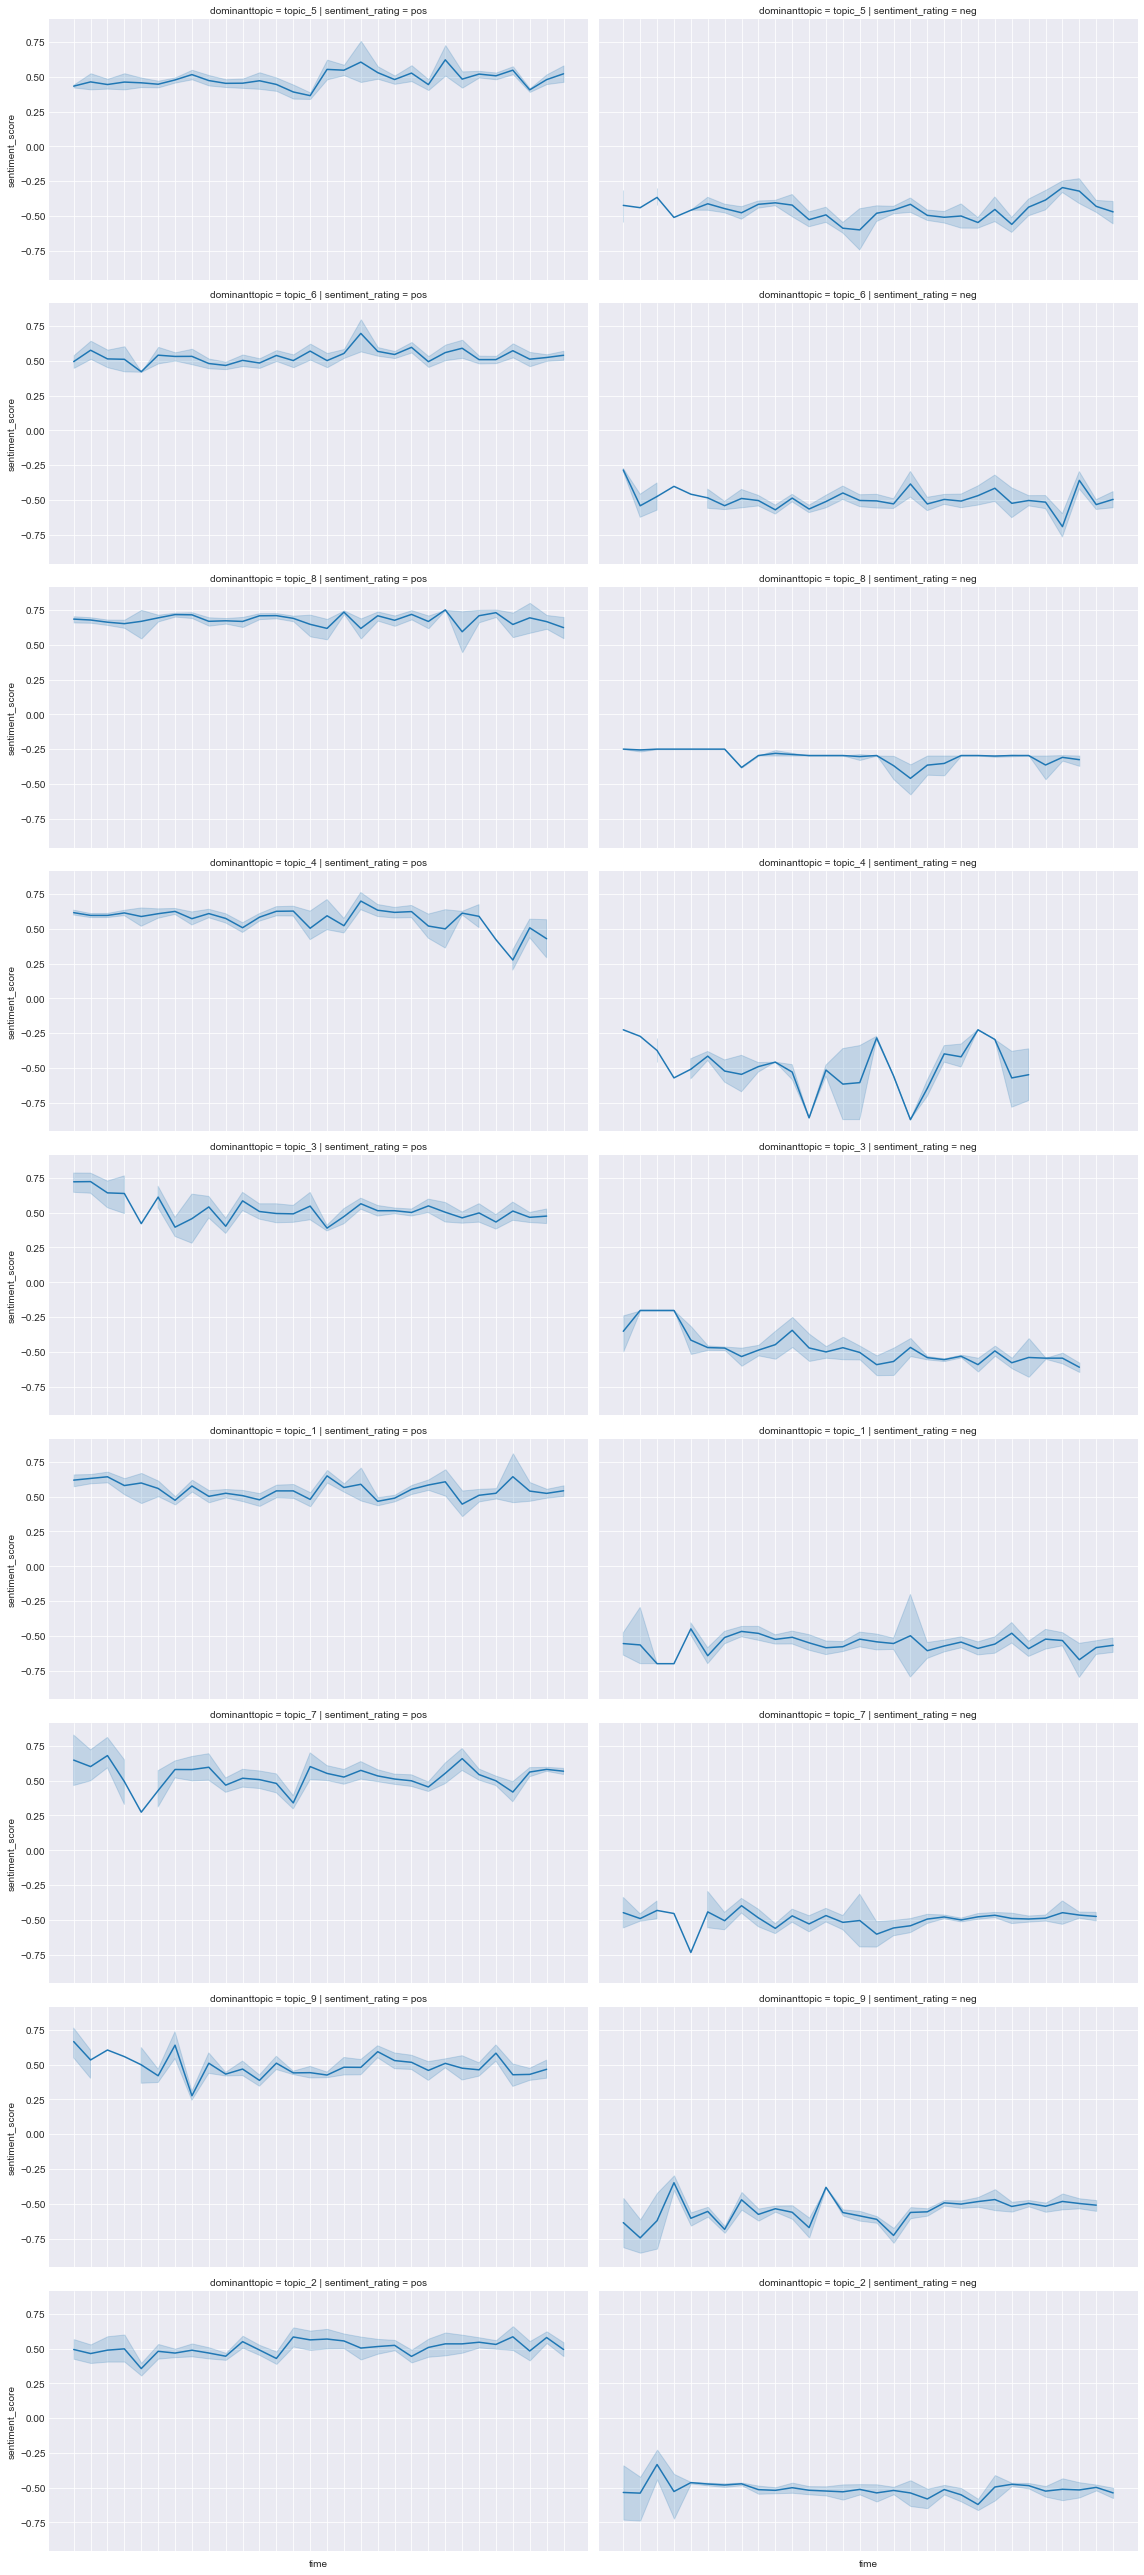

In [39]:
g = sns.FacetGrid(df[facemask], col='sentiment_rating',row='dominanttopic',height=4,aspect=2)
plt.title('How were sentiments split up by topic?',loc='center', fontsize=20)
g.map(sns.lineplot, 'time', 'sentiment_score')
g.set(xticklabels=[])
plt.show()

In [40]:
modeldf=pd.read_csv('../datasets/muntot_topics.csv')
pd.set_option('display.max_colwidth', 100)
modeldf

dominant topic  \
0        topic_1   
1        topic_2   
2        topic_3   
3        topic_4   
4        topic_5   
5        topic_6   
6        topic_7   
7        topic_8   
8        topic_9   

                                                                                              keywords  \
0                     ['go', 'first', 'time', 'goal', 'game', 'league', 'half', 'need', 'let', 'pron']   
1                 ['man', 'utd', 'penalty', 'get', 'ole', 'maguire', 'player', 'need', 'min', 'blame']   
2               ['right', 'fan', 'play', 'team', 'patrice', 'evra', 'one', 'deserve', 'sky', 'mulive']   
3                 ['live', 'stream', 'fee', 'add', 'telles', 'alex', 'player', 'join', 'also', 'move']   
4               ['goal', 'son', 'man', 'old', 'utd', 'username', 'trafford', 'kane', 'bruno', 'score']   
5                ['username', 'game', 'get', 'one', 'pron', 'back', 'cavani', 'sign', 'sancho', 'see']   
6                    ['see', 'fan', 'sancho', 'buy', 'jose', 'mourinho', 'evra', 'sky', 'go', 'right']   
7        ['telles', 'alex', 'medical', 'hour', 'next', 'transfer', 'reach', 'agreement', 'last', 'go']   
8  ['martial', 'red', 'card', 'lamela', 'username', 'man', 'solskjaer', 'send', 'utterly_delude', '...   

   tweetcount  topic_percent  
0        4909       0.126844  
1        5830       0.150642  
2        3419       0.088344  
3        1910       0.049353  
4        6421       0.165913  
5        4985       0.128808  
6        3242       0.083770  
7        2687       0.069430  
8        5298       0.136896

# Wordclouds

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from PIL import Image
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [5]:
positivewords = vectorizer.fit_transform(df['text'].loc[df['sentiment_rating']=='pos'])

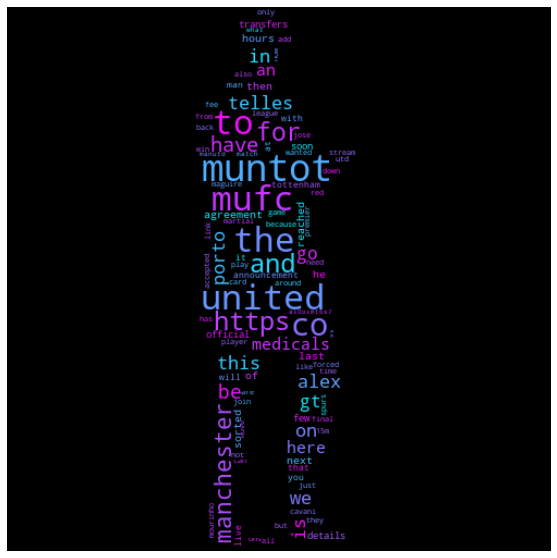

In [6]:
vocab = vectorizer.get_feature_names()
common_words = pd.DataFrame(positivewords.toarray(), columns = vocab).sum().sort_values(ascending = False)
mask = np.array(Image.open('../image/mourinho.png'))
                
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="black",
                      colormap='cool',
                      mask=mask)
    
# Call the function using the frequencies
wordcloud.generate_from_frequencies(frequencies=common_words)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [8]:
negativewords = vectorizer.fit_transform(df['text'].loc[df['sentiment_rating']=='neg'])

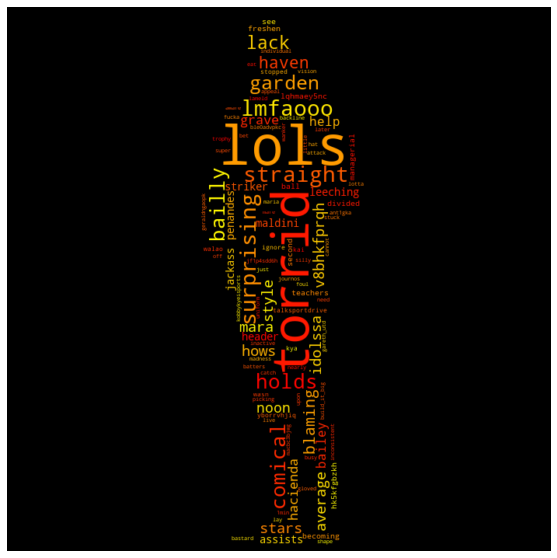

In [9]:
vocab = vectorizer.get_feature_names()
common_words = pd.DataFrame(positivewords.toarray(), columns = vocab).sum().sort_values(ascending = False)
mask = np.array(Image.open('../image/ole.png'))
                
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="black",
                      colormap='autumn',
                      mask=mask)
    
# Call the function using the frequencies
wordcloud.generate_from_frequencies(frequencies=common_words)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()